In [ ]:
# Carreon, Ma. Addine Anne T.
# A1
# CS158-1L
# January 20, 2024 

# Exploring Support Vector Machines

**NOTE: For this example, we will explore the algorithm, so we'll skip scaling and also skip a train/test split and instead see how the various parameters can change an SVM (easiest to visualize the effects  in classification)**

## SVM - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

## Classes

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

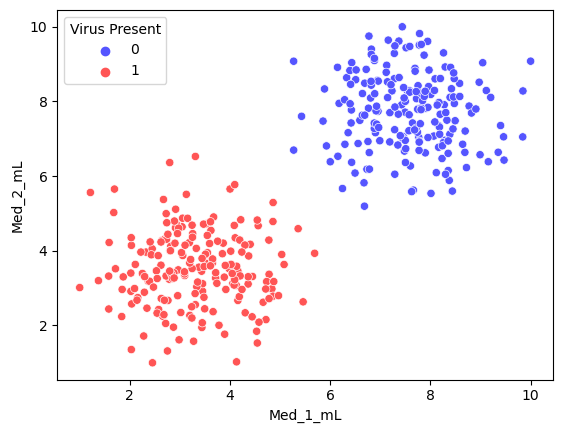

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present',
              data=df, palette='seismic')

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

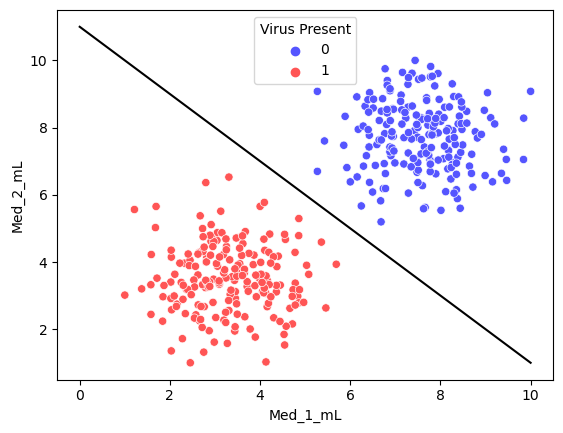

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL',hue='Virus Present', palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace (0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

## SVM - Support Vector Machine

In [7]:
from sklearn.svm import SVC # Support Vector Classifier

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [8]:
y = df ['Virus Present']
X = df.drop('Virus Present', axis=1)

In [9]:
model = SVC(kernel='linear', C=1000)
model.fit(X.values, y)

SVC(C=1000, kernel='linear')

In [10]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

In [11]:
def plot_svm_boundary(model, X, y):
    X = X.values 
    y = y.values
    
    # scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
                        
    # plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
                
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, 
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

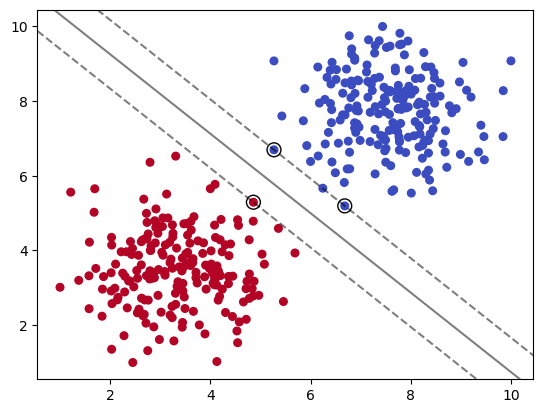

In [12]:
plot_svm_boundary(model, X, y)

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared 12 penalty. 

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [13]:
model = SVC (kernel='linear', C=0.05)
model.fit(X.values, y)

SVC(C=0.05, kernel='linear')

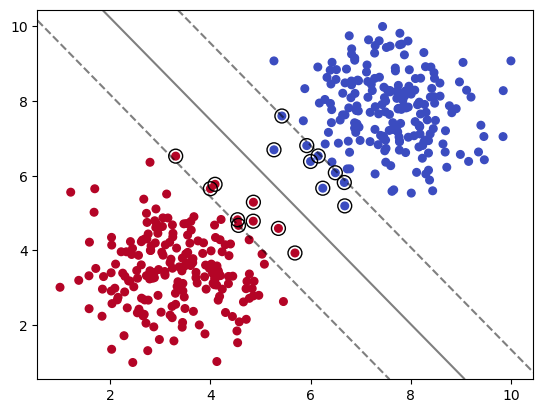

In [14]:
plot_svm_boundary(model,X,y)

### Kernel

$\color{Blue}{\text{Choosing a Kernel}}$
#### rbf -  $\color{Blue}{\text{Radial Basis Function}}$

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

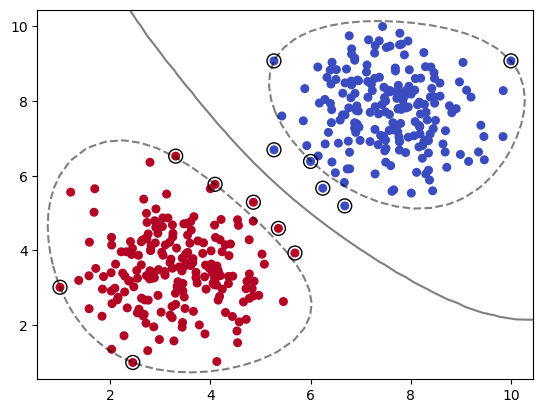

In [15]:
model = SVC(kernel='rbf', C=1)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

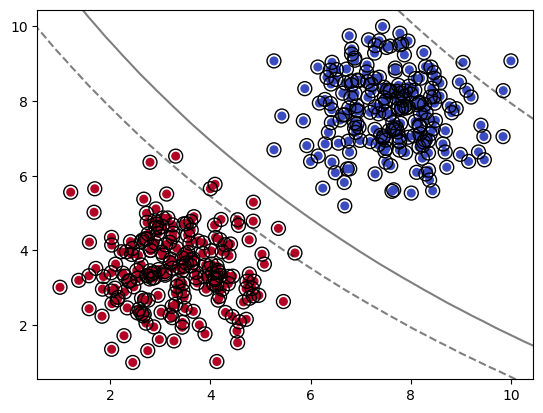

In [16]:
model = SVC(kernel='sigmoid')
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

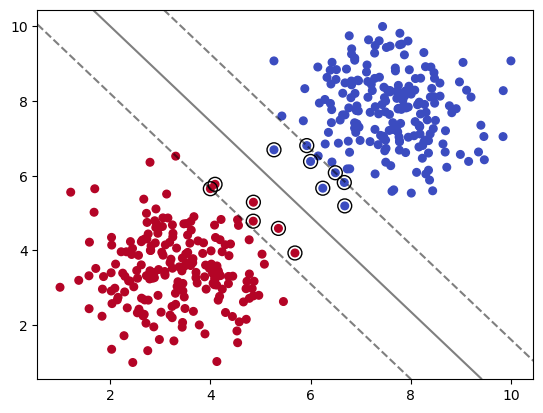

In [17]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

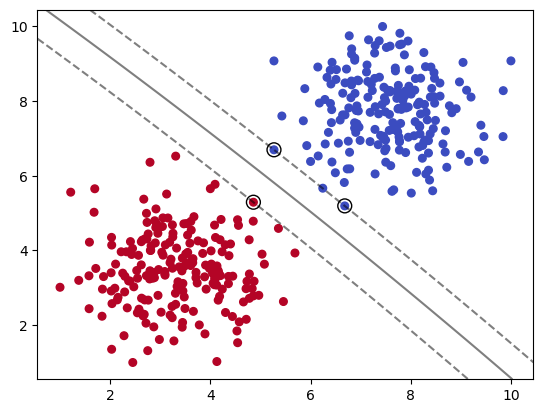

In [18]:
model = SVC(kernel='poly', C=1, degree=2) 
model.fit(X.values, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto') or float, default='scale' Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if `gamma='scale'`` (default) is passed then it uses
      1 / (n_features ✶ X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

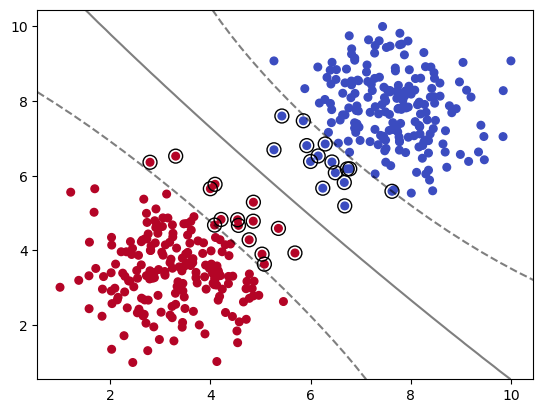

In [19]:
model = SVC(kernel='rbf', C=1, gamma=0.01) 
model.fit(X.values, y) 
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
svm = SVC()
param_grid = {'C': [0.01, 0.1,1], 'kernel':['linear', 'rbf']}
grid = GridSearchCV (svm, param_grid)

In [22]:
# Note again we didn't split Train | Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [23]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [24]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train test split and get final evaluation
metrics.
